<a href="https://colab.research.google.com/github/chandra-prashanth/stock_price_prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import pandas as pd

# Download MSFT data
ticker = "MSFT"
data = yf.download(ticker, start="1986-03-12", end="2022-03-25")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data

Price,Close,High,Low,Open,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT
Date,,,,,
1986-03-13,0.059707,0.062373,0.054376,0.054376,1031788800
1986-03-14,0.061839,0.062906,0.059707,0.059707,308160000
1986-03-17,0.062906,0.063439,0.061839,0.061839,133171200
1986-03-18,0.061306,0.063439,0.060773,0.062906,67766400
1986-03-19,0.060240,0.061839,0.059707,0.061306,47894400
...,...,...,...,...,...
2022-03-18,292.853607,293.409240,285.347807,287.921215,43390600
2022-03-21,291.615631,292.570928,287.463052,291.352451,28351200


In [4]:
data = data.reset_index()
data.columns = ['Date',  'close', 'High', 'Low', 'open', 'Volume']
data.to_csv('msft_stock_data.csv', index=False)

In [ ]:
data

,Date,close,High,Low,open,Volume
0,1986-03-13,0.059707,0.062373,0.054376,0.054376,1031788800
1,1986-03-14,0.061839,0.062906,0.059707,0.059707,308160000
2,1986-03-17,0.062906,0.063439,0.061839,0.061839,133171200
3,1986-03-18,0.061306,0.063439,0.060773,0.062906,67766400
4,1986-03-19,0.060240,0.061839,0.059707,0.061306,47894400
...,...,...,...,...,...,...
9078,2022-03-18,292.853607,293.409240,285.347807,287.921215,43390600
9079,2022-03-21,291.615662,292.570958,287.463083,291.352481,28351200
9080,2022-03-22,296.391998,297.308295,291.235397,292.239420,27599700
9081,2022-03-23,291.937286,295.582989,290.211934,292.931582,25715400


In [5]:
df = data[['Date','close']]
df

,Date,close
0,1986-03-13,0.059707
1,1986-03-14,0.061839
2,1986-03-17,0.062906
3,1986-03-18,0.061306
4,1986-03-19,0.060240
...,...,...
9078,2022-03-18,292.853607
9079,2022-03-21,291.615631
9080,2022-03-22,296.392059
9081,2022-03-23,291.937225


In [6]:
df['Date']

,Date
0,1986-03-13
1,1986-03-14
2,1986-03-17
3,1986-03-18
4,1986-03-19
...,...
9078,2022-03-18
9079,2022-03-21
9080,2022-03-22
9081,2022-03-23


In [ ]:
df.index = df.pop('Date')

In [7]:
df

,Date,close
0,1986-03-13,0.059707
1,1986-03-14,0.061839
2,1986-03-17,0.062906
3,1986-03-18,0.061306
4,1986-03-19,0.060240
...,...,...
9078,2022-03-18,292.853607
9079,2022-03-21,291.615631
9080,2022-03-22,296.392059
9081,2022-03-23,291.937225


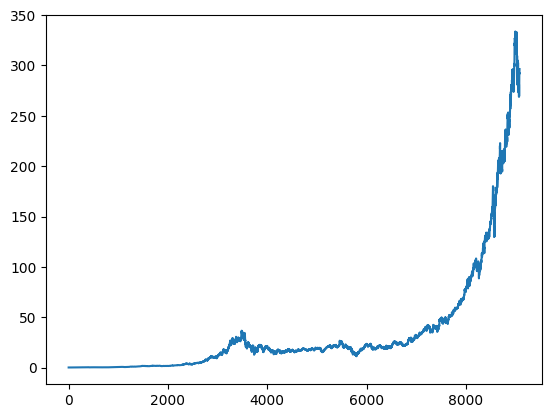

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.index, df['close'])


In [9]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [13]:
print(type(df.index))
print(df.head(5))
print(df.tail(5))
print(df.index.min(), df.index.max())
print(df.shape)
print(df.columns)

<class 'pandas.core.indexes.range.RangeIndex'>
        Date     close
0 1986-03-13  0.059707
1 1986-03-14  0.061839
2 1986-03-17  0.062906
3 1986-03-18  0.061306
4 1986-03-19  0.060240
           Date       close
9078 2022-03-18  292.853607
9079 2022-03-21  291.615631
9080 2022-03-22  296.392059
9081 2022-03-23  291.937225
9082 2022-03-24  296.431061
0 9082
(9083, 2)
Index(['Date', 'close'], dtype='object')


In [16]:
import pandas as pd
import numpy as np
import datetime

def str_to_datetime(date_str):
    return pd.to_datetime(date_str).to_pydatetime()

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
    dataframe = dataframe.copy()
    if 'Date' in dataframe.columns:
        dataframe['Date'] = pd.to_datetime(dataframe['Date'])
        dataframe.set_index('Date', inplace=True)
    else:
        raise ValueError("DataFrame must have a 'Date' column")

    if not isinstance(dataframe.index, pd.DatetimeIndex):
        raise ValueError("Index must be a DatetimeIndex")

    first_date = str_to_datetime(first_date_str)
    last_date = str_to_datetime(last_date_str)

    target_date = first_date
    dates = []
    X, Y = [], []
    last_time = False

    while True:
        try:
            df_subset = dataframe.loc[:target_date].tail(n+1)
        except KeyError:
            print(f"Error: Date {target_date} not found in DataFrame")
            return None

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return None

        values = df_subset['close'].to_numpy()
        x, y = values[:-1], values[-1]
        dates.append(target_date)
        X.append(x)
        Y.append(y)
        next_dates = dataframe.index[dataframe.index > target_date]
        if not next_dates.size or next_dates[0] > last_date:
            last_time = True
        else:
            target_date = next_dates[0]

        if last_time:
            break

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates
    X = np.array(X)
    for i in range(n):
        ret_df[f'Target-{n-i}'] = X[:, i]
    ret_df['Target'] = Y
    return ret_df
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2022-03-23',
                                n=3)
windowed_df


,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,228.180069,229.717438,227.667603,224.650833
1,2021-03-26,229.717438,227.667603,224.650833,228.653824
2,2021-03-29,227.667603,224.650833,228.653824,227.454865
3,2021-03-30,224.650833,228.653824,227.454865,224.177094
4,2021-03-31,228.653824,227.454865,224.177094,227.967331
...,...,...,...,...,...
247,2022-03-17,269.468628,279.908478,286.965942,287.774994
248,2022-03-18,279.908478,286.965942,287.774994,292.853607
249,2022-03-21,286.965942,287.774994,292.853607,291.615631
250,2022-03-22,287.774994,292.853607,291.615631,296.392059


In [17]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((252,), (252, 3, 1), (252,))

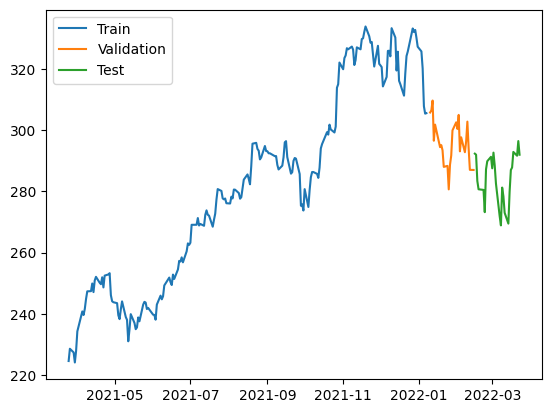

In [18]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Input
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
model = Sequential([layers.Input(shape=(3,1)),
                   layers.LSTM(64),
                   layers.Dense(32,activation='relu'),
                   layers.Dense(32,activation='relu'),
                   layers.Dense(1)])
model.compile(loss='mse',
             optimizer=Adam(learning_rate=0.001),
             metrics=['mean_absolute_error'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,065 (78.38 KB)

 Trainable params: 20,065 (78.38 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100)

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 79405.4375 - mean_absolute_error: 280.0467 - val_loss: 87351.4922 - val_mean_absolute_error: 295.4681
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 80134.3672 - mean_absolute_error: 281.4273 - val_loss: 87119.0938 - val_mean_absolute_error: 295.0745
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 79447.3594 - mean_absolute_error: 280.1085 - val_loss: 86852.9688 - val_mean_absolute_error: 294.6232
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 79082.5938 - mean_absolute_error: 279.5187 - val_loss: 86395.3516 - val_mean_absolute_error: 293.8456
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 78547.3359 - mean_absolute_error: 278.4713 - val_loss: 85679.9297 - val_mean_absolute_error: 292.6256
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 76980.3594 - mean_absolute_error: 275.6796 - val_loss: 84542.1719 - val_mean_absolute_error: 290.6751
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


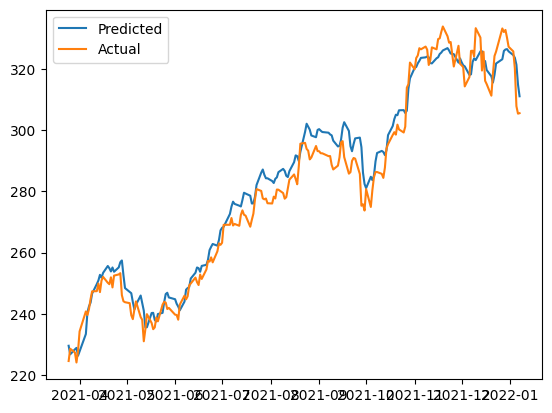

In [23]:
train_pred = model.predict(X_train).flatten()
plt.plot(dates_train,train_pred)
plt.plot(dates_train,y_train)
plt.legend(['Predicted','Actual'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


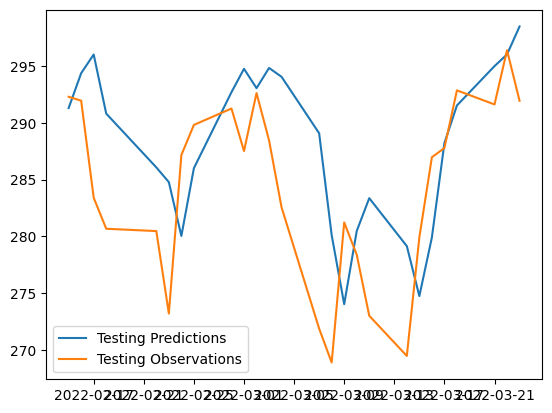

In [27]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


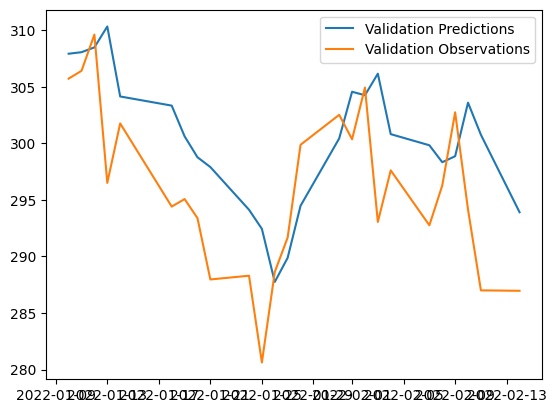

In [28]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

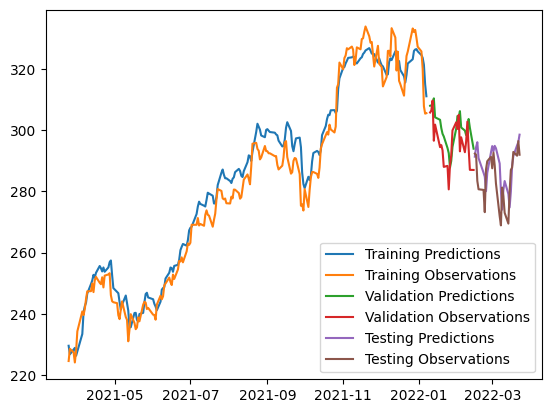

In [31]:
plt.plot(dates_train, train_pred)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])